In [1]:
source("/root/workspace/sjh/code/Compare/MIDAS/utils/utils.R")
library(tibble)
library(RColorBrewer)
library(dynutils)
library(stringr)
library(Hmisc)
library(plyr)
library(gdata)
library(dplyr)
library(scales)
library(ggimage)
library(cowplot)
library(patchwork)
source("knit_table.R")


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'plyr'


The following objects are masked from 'package:Hmisc':

    is.discrete, summarize


gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.



gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.


Attaching package: 'gdata'


The following object is masked from 'package:stats':

    nobs


The following object is masked from 'package:utils':

    object.size


The following object is masked from 'package:base':

    startsWith



Attaching package: 'dplyr'


The following objects are masked from 'package:gdata':

    combine, first, last


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:Hmisc':

    src, summarize


The following objects are masked from 'package:stats':

    filter, lag


The 

In [2]:
data_name <- "figure4.csv"
data_all <- read.csv(data_name)
names(data_all) <- str_replace_all(names(data_all), c(
                            "NMI" = "NMI",
                            "ARI" = "ARI",
                            "il_score_asw" = "Isolated label ASW",
                            # "cLISI" = "cLISI",
                            "Biological.conservation" = "Biological conservation",
                            "iLISI" = "iLISI",
                            "graph_conn" = "graph connectivity",
                            "kBET" = "kBET",
                            "Batch.correction" = "Batch correction",
                            "RNA.Pearson.r" = "RNA Pearson r",
                            "ADT.Pearson.r" = "ADT Pearson r",
                            "Omics.Imputation" = "Omics Imputation",
                            "Overall.score" = "Overall score"
))

In [3]:
data <- list()
metrics_tab <- list()

Sub_Ratio <- c("10%", "20%", "50%", "100%")
    for(i in seq(1, length(Sub_Ratio))) {
    print(Sub_Ratio[i])
    data[[i]] <- subset(data_all, Subset.Ratio == Sub_Ratio[i], select = -Subset.Ratio)
    metrics_tab[[i]] <- as.data.frame(data[[i]])
    metrics_tab[[i]] <- metrics_tab[[i]][order(metrics_tab[[i]]$`Overall score`, decreasing = T), ]
}

[1] "10%"
[1] "20%"
[1] "50%"
[1] "100%"


In [4]:
group_bio <- c("NMI", "ARI", "Isolated label ASW")
group_impu <- c("RNA.Pearson r", "ADT.Pearson r")
group_batch <- c("iLISI", "graph_conn", "kBET")
n_metrics_impu <- length(group_impu)
n_metrics_bio <- length(group_bio)
n_metrics_batch <- length(group_batch)

In [5]:
for(i in seq(1, length(Sub_Ratio))) {
    names(metrics_tab[[i]]) <- str_replace_all(names(metrics_tab[[i]]), c(
                            "NMI" = "NMI",
                            "ARI" = "ARI",
                            "il_score_asw" = "Isolated label ASW",
                            # "cLISI" = "cLISI",
                            "Biological.conservation" = "Biological conservation",
                            "iLISI" = "iLISI",
                            "graph_conn" = "graph connectivity",
                            "kBET" = "kBET",
                            "Batch.correction" = "Batch correction",
                            "RNA.Pearson.r" = "RNA Pearson r",
                            "ADT.Pearson.r" = "ADT Pearson r",
                            "Omics.Imputation" = "Omics Imputation",
                            "Overall.score" = "Overall score"
))
}

In [6]:
column_info <- data.frame(id = colnames(data_all[,2:ncol(data_all)]),
                        group = c("Text", rep("Biological conservation", (1 + n_metrics_bio)), 
                                    rep("Batch correction", (1 + n_metrics_batch)), 
                                    rep("Omics Imputation", (1 + n_metrics_impu)),"Overall score"),
                        geom =  c("text", rep("circle", n_metrics_bio), "bar",
                                    rep("circle", n_metrics_batch), "bar", 
                                    rep("circle", n_metrics_impu), "bar", "bar"),
                        width = c(10.2, rep(1, n_metrics_bio), 2,
                                    rep(1, n_metrics_batch), 2,
                                    rep(1, n_metrics_impu), 2, 2),
                        overlay = F)

In [7]:
# https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/
palettes <- list("Overall score" = "Reds",
                 "Batch correction" = "Greens",
                 "Omics Imputation" = "YlOrBr",
                 "Biological conservation" = "Blues")

In [8]:
plot <- list()
source("knit_table.R")
for(i in seq(1, length(Sub_Ratio))) {
    plot[[i]] <- scIB_knit_table(data = metrics_tab[[i]], dataset = dataset, column_info = column_info, row_info = data.frame(id = metrics_tab[[i]]$Method),
                     palettes = palettes, num = Sub_Ratio[i], task = F, usability = F)
}

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


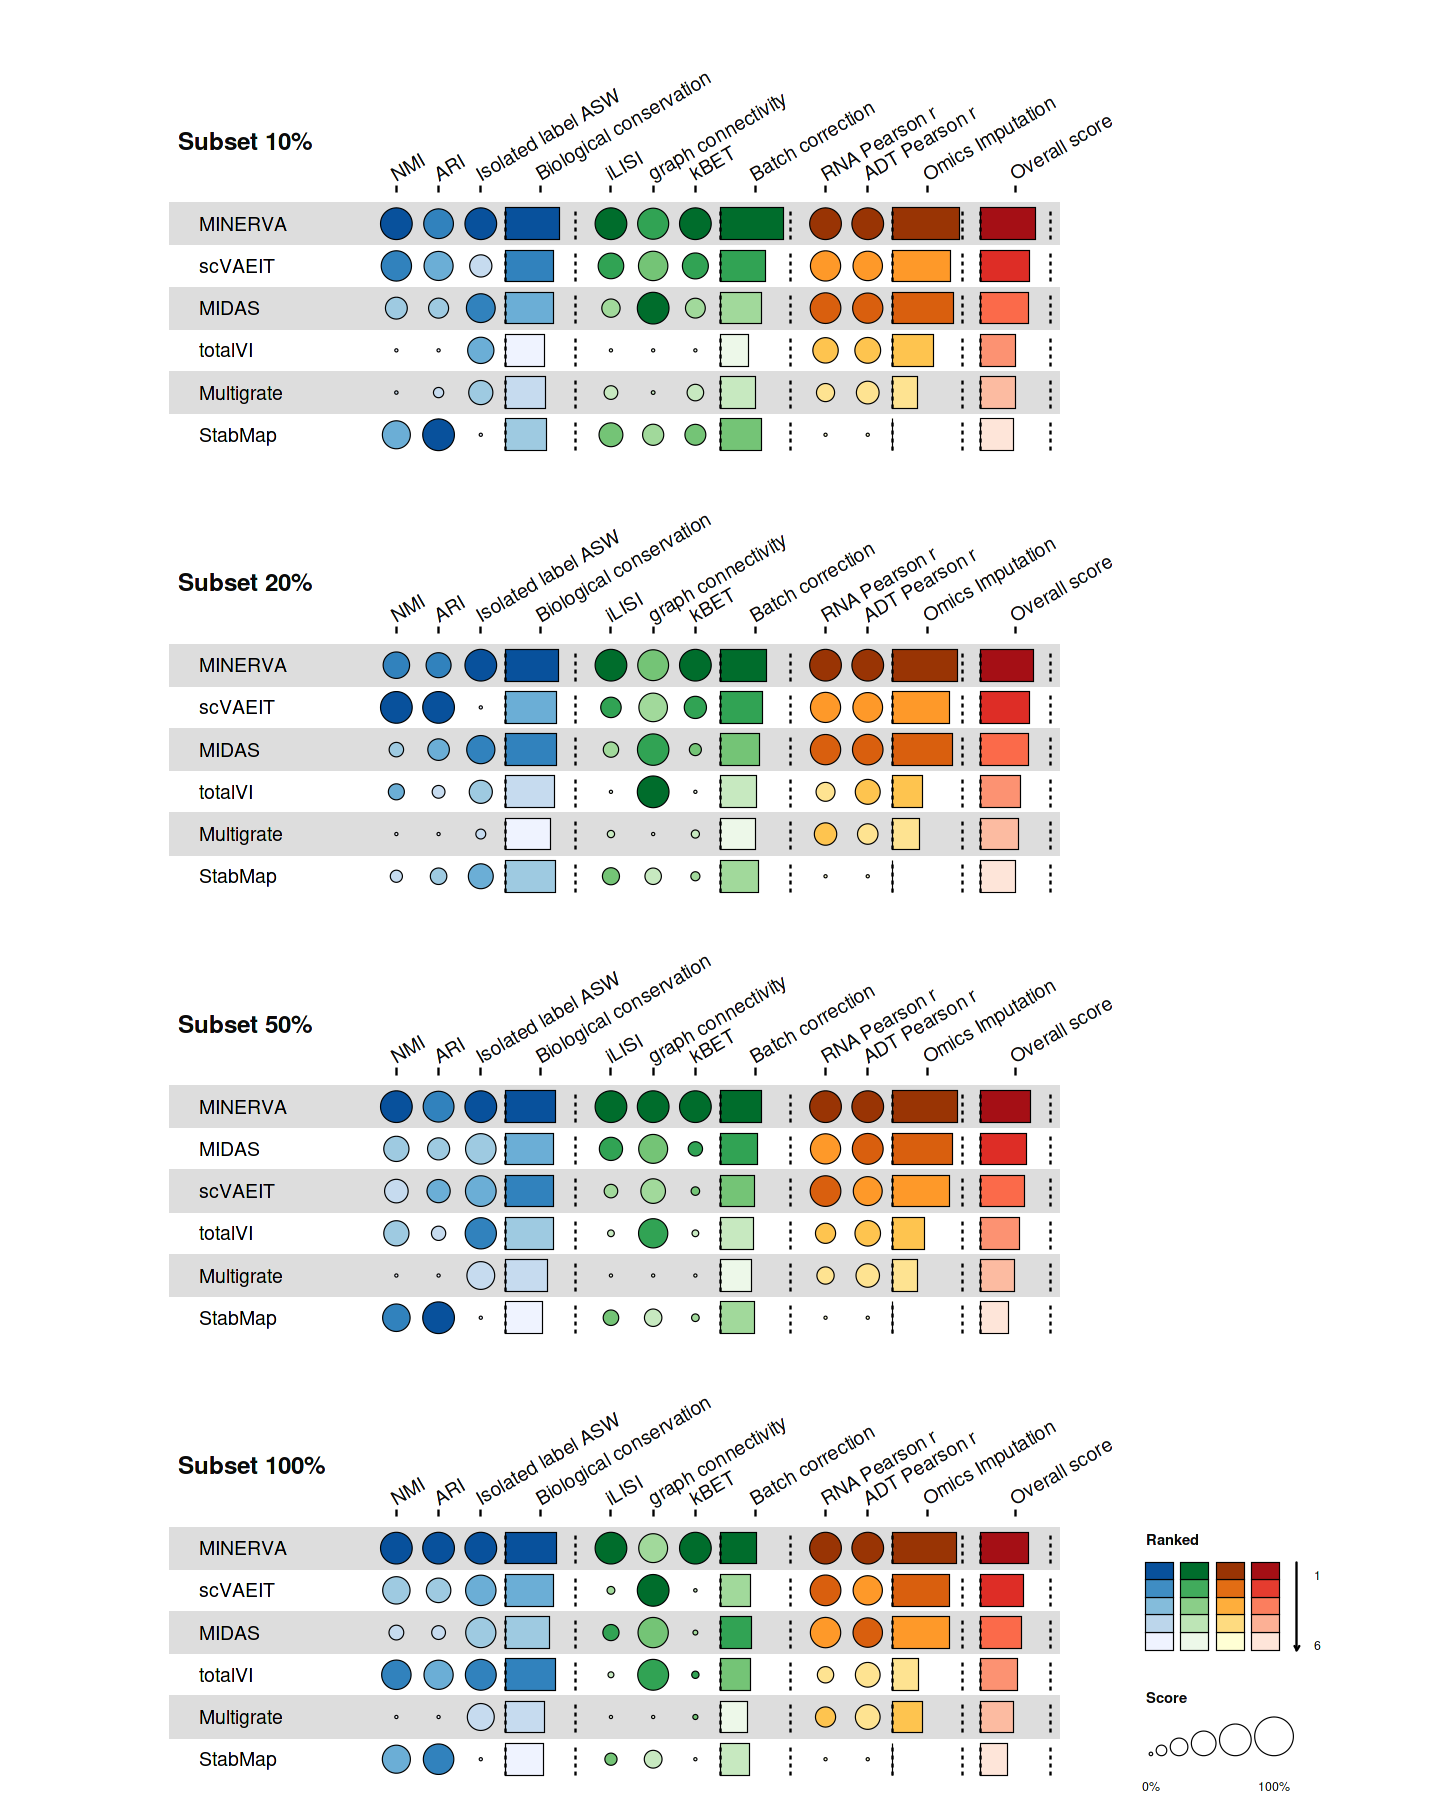

In [9]:
options(repr.plot.width = 12, repr.plot.height = 15)
Q <- plot[[1]] / plot[[2]] / plot[[3]] / plot[[4]]
Q

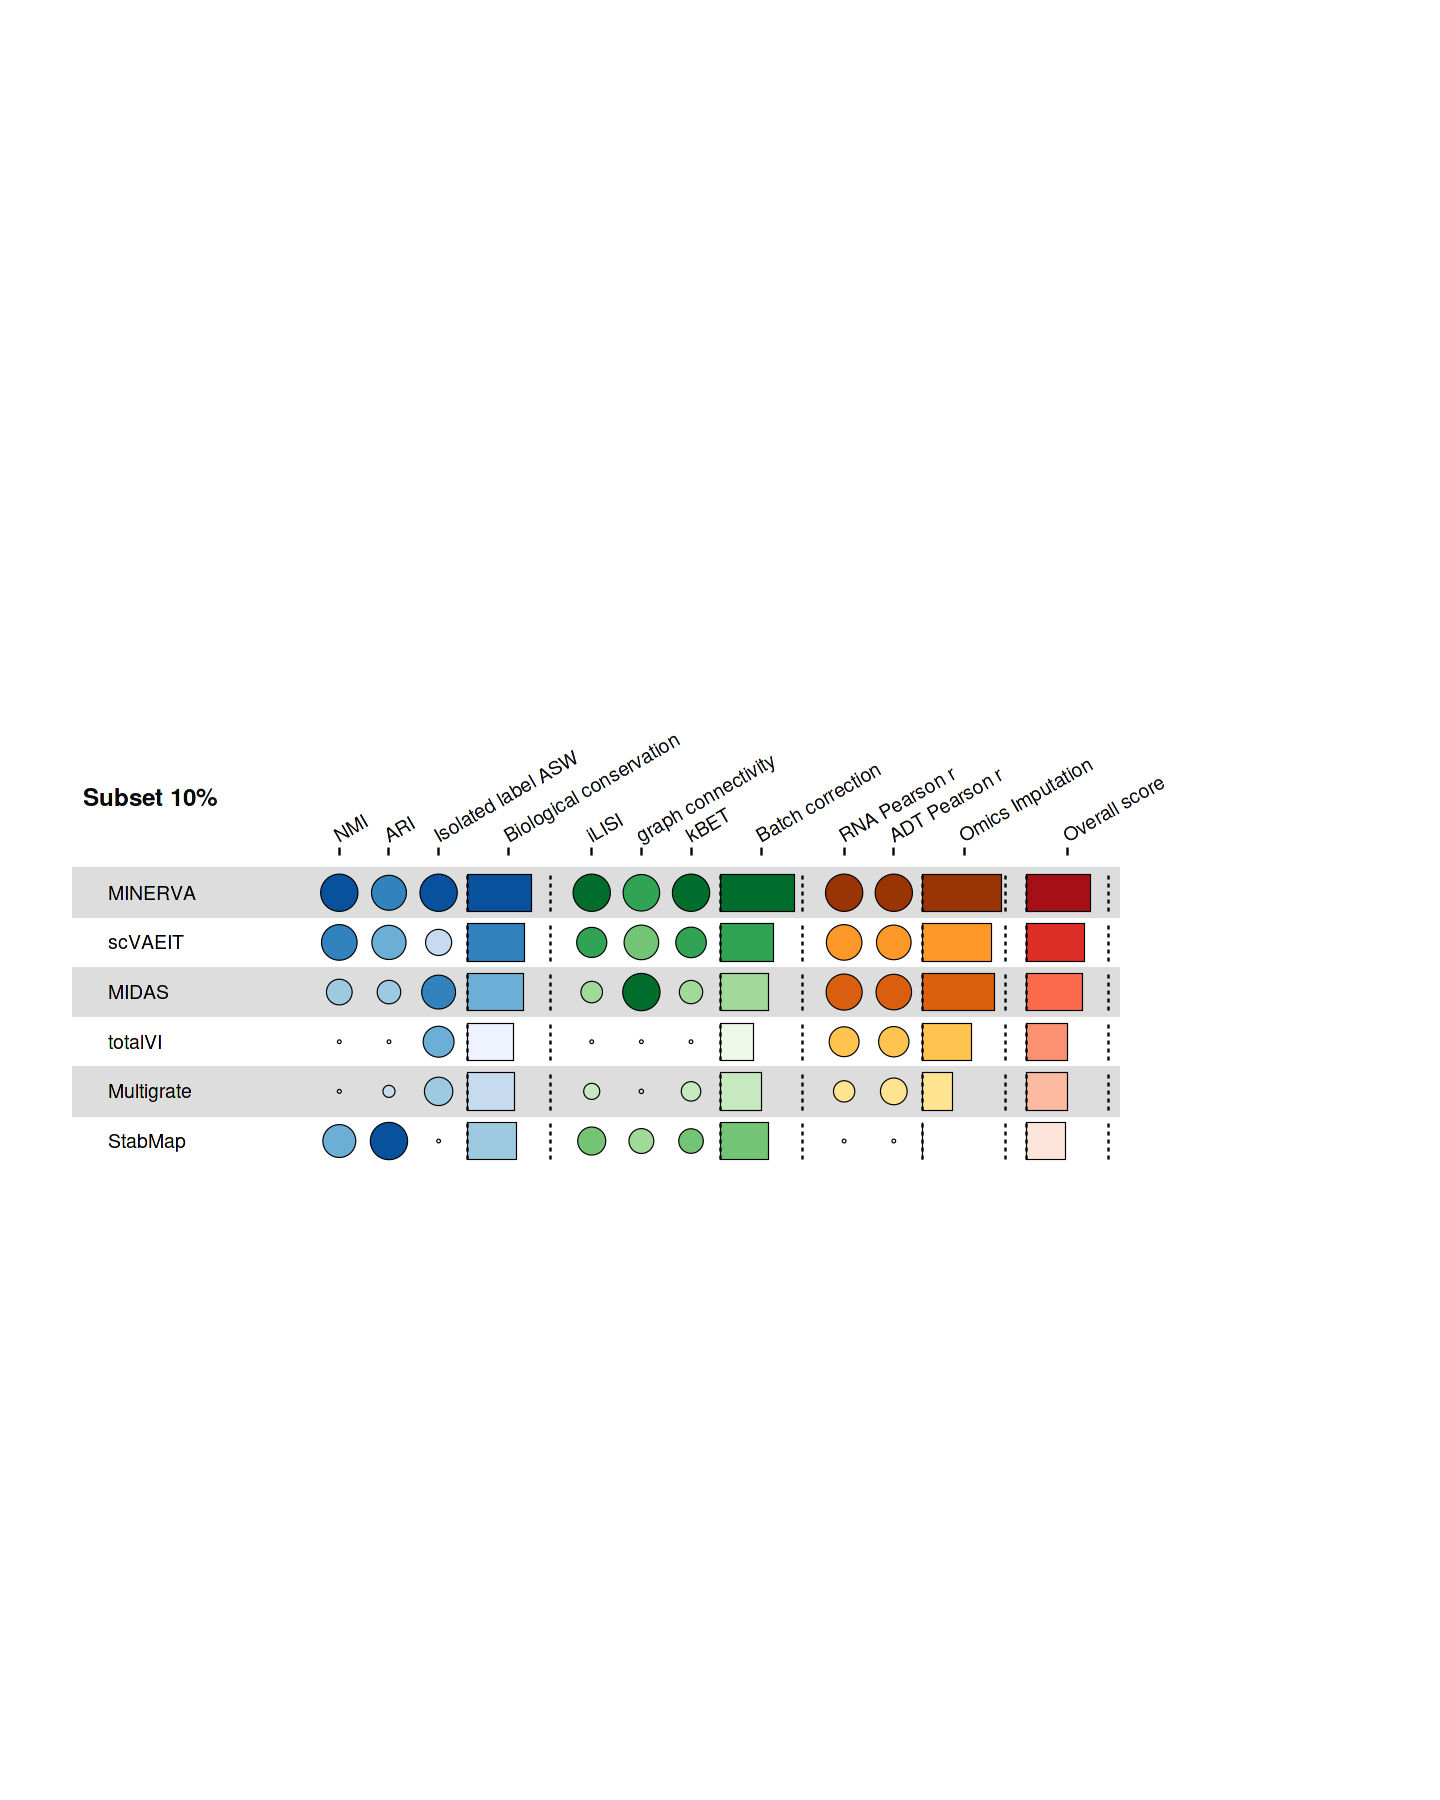

In [10]:
plot[[1]]

In [11]:
ggsave("figure4.svg", Q, dpi = 300, width = 12, height = 15)